<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/ejercicio_retornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd
import datetime
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#kolmogorov-smirnov

data_total = yf.download('JNJ')
data_total_adj = data_total['Adj Close'].to_frame()

for columna in data_total_adj.columns:
  primer_indice_con_informacion = data_total_adj[columna].first_valid_index()
  ultimo_indice_no_nulo = data_total_adj[columna].last_valid_index()
  print(f"para '{columna}': inicia en  {primer_indice_con_informacion} y finaliza en {ultimo_indice_no_nulo}")

[*********************100%%**********************]  1 of 1 completed
para 'Adj Close': inicia en  1962-01-02 00:00:00 y finaliza en 2023-10-27 00:00:00


In [216]:
len(data_total)

15563

In [217]:
data_total.shape

(15563, 6)

In [218]:
data_total_adj[columna].first_valid_index()

Timestamp('1962-01-02 00:00:00')

In [219]:
ret = data_total_adj.pct_change()#retornos simples
ret.dropna(inplace=True)
ret

,Adj Close
Date,
1962-01-03,-0.015547
1962-01-04,-0.010522
1962-01-05,-0.015962
1962-01-08,-0.016216
1962-01-09,0.010990
...,...
2023-10-23,-0.010523
2023-10-24,-0.001057
2023-10-25,0.002248


In [220]:
return_c1 = np.log(data_total_adj).apply(lambda x: x.diff())
return_c1.dropna(inplace=True)
return_c1

,Adj Close
Date,
1962-01-03,-0.015670
1962-01-04,-0.010578
1962-01-05,-0.016090
1962-01-08,-0.016349
1962-01-09,0.010930
...,...
2023-10-23,-0.010579
2023-10-24,-0.001057
2023-10-25,0.002246


Accumulados

In [221]:
r_acu_d=data_total_adj.iloc[-2]/data_total_adj.iloc[0] ##i do -2 because i have one more day than the teacher
r_acu_d

Adj Close    2291.787378
dtype: float64

In [222]:
#to get the 1000 euros invested
r_acu_d*1000

Adj Close    2.291787e+06
dtype: float64

2,291,788

In standard decimal notation, it's just over two million (2,291,788).

until here - teacher

from here my attempt:

In [223]:
#mystuuuuufff-----------------------------------------------------------------------------
#r_acu_d=data_total_adj.tail(1)-data_total_adj.head(1)
#rendimiento diario promedio
#prom_d = r_acu_d**(1/12)-1
#prom_d
#prom_mes = (prom_d+1)**22 - 1
#prom_mes
#prom_anual=(prom_d+1)**252 - 1
#prom_anual

In [224]:
data_total_adj.head(1)

,Adj Close
Date,
1962-01-02,0.065015


In [225]:
data_total_adj.iloc[0]

Adj Close    0.065015
Name: 1962-01-02 00:00:00, dtype: float64

In [226]:
data_total_adj.tail(1)

,Adj Close
Date,
2023-10-27,145.494995


In [227]:
data_total_adj.iloc[-1]

Adj Close    145.494995
Name: 2023-10-27 00:00:00, dtype: float64

In [228]:
r_acu_d=data_total_adj.iloc[-1]/data_total_adj.iloc[0] -1
r_acu_d

Adj Close    2236.876466
dtype: float64

In [229]:
#rendimiento diario promedio
prom_d = r_acu_d**(1/len(data_total))-1
prom_d

Adj Close    0.000496
dtype: float64

In [230]:
prom_mes = (prom_d+1)**22 - 1
prom_mes

Adj Close    0.010963
dtype: float64

In [231]:
prom_anual=(prom_d+1)**252 - 1
prom_anual

Adj Close    0.133022
dtype: float64

si hubieramos invertido 1000 euros el primer dia, cuanto seria nuestra rentabilidad hasta ayer?

In [232]:
len(data_total)-1

15562

In [233]:
resultado=1000*r_acu_d
resultado

Adj Close    2.236876e+06
dtype: float64

los precios son autocorrelacionados - un poco mas, un poco menos - alietoria, no se pueden modelar stasisticamente. Camino alietorio.
varianza precio 1, 2,3.
por eso usamos retornos.
tenemos mirar la volatilidad historica. hay que ser estable en el tiempo, en una ventana de tiempo. Series numericas que mantienen propriedades en el tiempo

In [234]:
ret.mean()

Adj Close    0.0006
dtype: float64

In [235]:
ret.std()

Adj Close    0.014455
dtype: float64

# Datos en diferentes tiempos - meses

In [236]:
retornos_mensuales=ret.resample('M').apply(lambda x: (x+1).product()-1)
retornos_mensuales

,Adj Close
Date,
1962-01-31,-0.036270
1962-02-28,0.045488
1962-03-31,-0.002579
1962-04-30,-0.111110
1962-05-31,-0.078763
...,...
2023-06-30,0.067458
2023-07-31,0.012144
2023-08-31,-0.027912


In [237]:
retornos_mensuales.mean(),retornos_mensuales.std()
#if the p-value is above 0,05, it's normal

(Adj Close    0.012174
 dtype: float64,
 Adj Close    0.059064
 dtype: float64)

(array([  4.,  23.,  53., 129., 209., 167., 100.,  37.,  16.,   4.]),
 array([-0.17338807, -0.1348179 , -0.09624773, -0.05767755, -0.01910738,
         0.01946279,  0.05803296,  0.09660313,  0.1351733 ,  0.17374347,
         0.21231364]),
 <BarContainer object of 10 artists>)

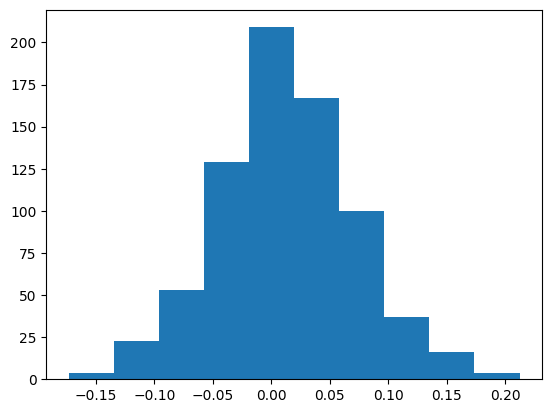

In [238]:
plt.hist(retornos_mensuales)

array([[<Axes: title={'center': 'Adj Close'}>]], dtype=object)

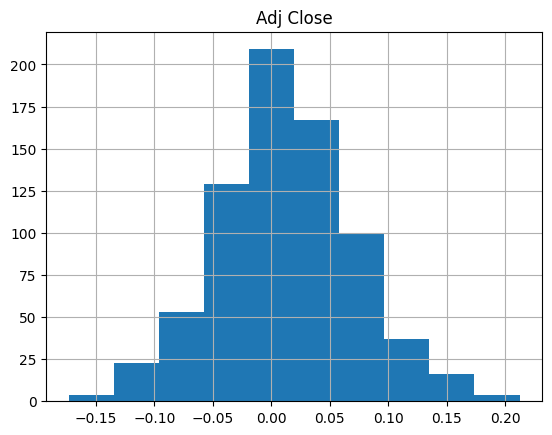

In [239]:
retornos_mensuales.hist()

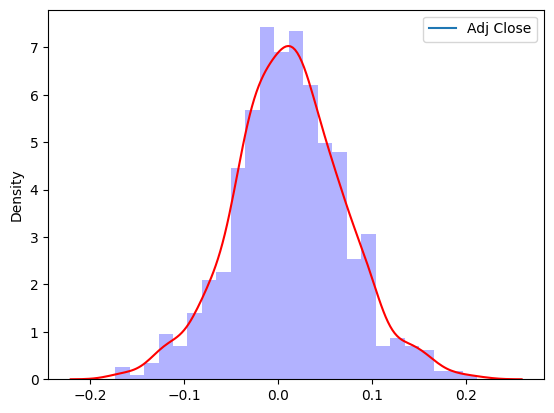

In [240]:
plt.hist(retornos_mensuales,bins=25, density=True, color='blue', alpha=0.3)
sns.kdeplot(retornos_mensuales, label='Line Curva Densidad') #TRY WITHOUT SNS......
plt.gca().lines[-1].set_color('red')
plt.show()

In [241]:
ks_statistic, ks_p_value = stats.kstest(retornos_mensuales['Adj Close'], 'norm')

print(f'the p_values: {ks_p_value}')

the p_values: 3.310971926063433e-132


# Datos en diferentes tiempos - years

In [242]:
retornos_anuales=ret.resample('Y').apply(lambda x: (x+1).product()-1)
retornos_anuales

,Adj Close
Date,
1962-12-31,-0.231551
1963-12-31,0.409998
1964-12-31,0.107964
1965-12-31,0.557972
1966-12-31,0.001953
...,...
2019-12-31,0.162200
2020-12-31,0.108237
2021-12-31,0.114381


In [243]:
retornos_anuales.mean(),retornos_anuales.std()

(Adj Close    0.153996
 dtype: float64,
 Adj Close    0.229554
 dtype: float64)

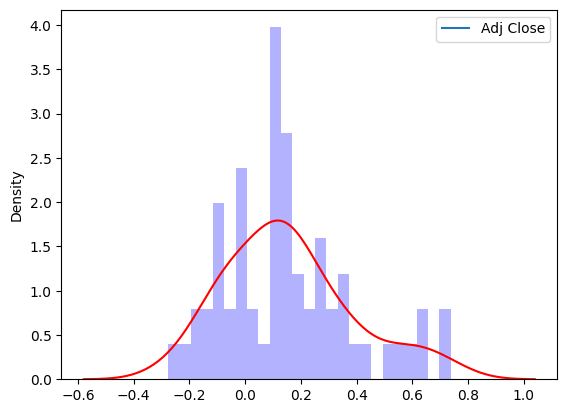

In [244]:
plt.hist(retornos_anuales,bins=25, density=True, color='blue', alpha=0.3)
sns.kdeplot(retornos_anuales, label='Line Curva Densidad') #TRY WITHOUT SNS......
plt.gca().lines[-1].set_color('red')
plt.show()

In [245]:
ks_statistic, ks_p_value = stats.kstest(retornos_anuales['Adj Close'], 'norm')

print(f'the p_values: {ks_p_value}')

the p_values: 1.0699324340629047e-09
